# Moran's Eigenvector and Its Approximations

The approximation is proposed in 
<div class="csl-entry">Murakami, D., &#38; Griffith, D. A. (2019). Eigenvector Spatial Filtering for Large Data Sets: Fixed and Random Effects Approaches. <i>Geographical Analysis</i>, <i>51</i>(1), 23–49. https://doi.org/10.1111/gean.12156</div>

See also R package `spmoran` developed by the author above.
https://cran.r-project.org/web/packages/spmoran/index.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import sklearn
from sklearn.cluster import KMeans

import sys
sys.path.insert(1, "../")

import DynamicESF
from DynamicESF import MoranI

print(f"{np.__version__=}")
print(f"{matplotlib.__version__=}")
print(f"{sklearn.__version__=}")
print(f"{DynamicESF.__version__=}")

np.__version__='1.21.5'
matplotlib.__version__='3.5.1'
sklearn.__version__='1.0.2'
DynamicESF.__version__='0.1.1'


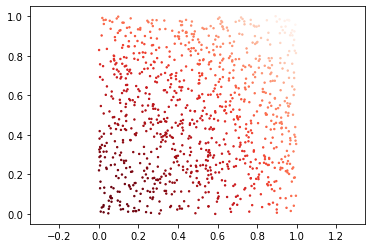

In [2]:
N = 1000
rng = np.random.default_rng(123)

# generate random locations X
X = rng.uniform(0, 1, size=(N, 2))

# generate some values on each location to calculate Moran's I statistics
# It does not affect on eigenvectors
z = -np.square(X).sum(axis=1)

plt.axis("equal")
plt.scatter(X[:, 0], X[:, 1], s=2, c=z, cmap="Reds")
plt.show()

# exact Moran's eigenvector

In [3]:
# select connectivity class
conn = MoranI.ExpConnectivity

# define Moran's I class
mc = MoranI.MC(connectivity=conn, site=X)

In [4]:
# You can calculate Moran's I statistics if you need.
Ival = mc.MoransI(z)
print("Moran's I = ", Ival)

Moran's I =  0.8088556240683045


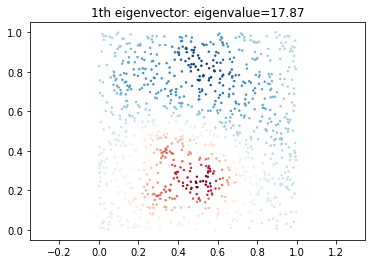

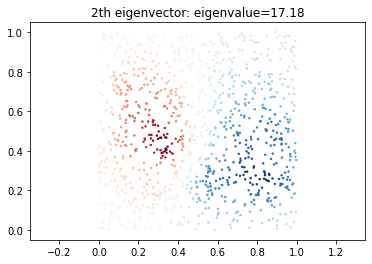

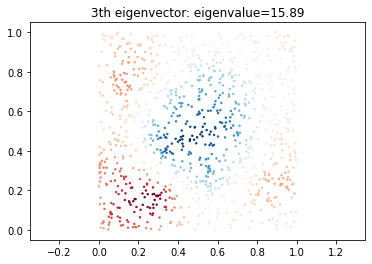

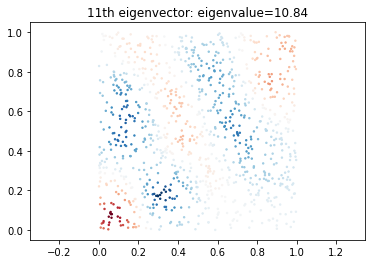

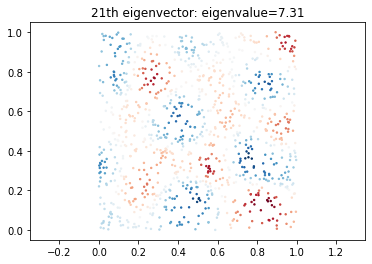

In [5]:
# calc. eigenvectors
mc.EigenDecomp()

# get eigenvectors
ev = mc.e

# get eigenvalues
lam = mc.lam

# plot eigenvectors
for i in [0, 1, 2, 10, 20]:
    plt.axis("equal")
    plt.title("{}th eigenvector: eigenvalue={:.2f}".format(i+1, lam[i]))
    plt.scatter(X[:,0], X[:,1], c=ev[:,i], cmap="RdBu", s=2)
    plt.show()

# Approximation

In [6]:
# generate "knots" for approximation
n_knots = 200 # see Murakami and Griffith (2019)
kmeans_rlst = KMeans(n_clusters=n_knots, random_state=234).fit(X)
knots = kmeans_rlst.cluster_centers_

# define and calculate approximated eigenvalues
mcapprx = MoranI.MClarge(connectivity=conn, site=X, knots=knots)
mcapprx.EigenDecomp()

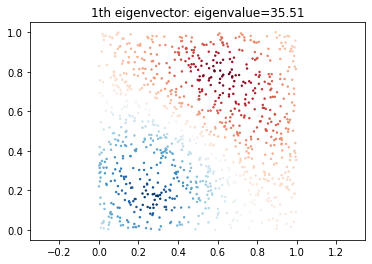

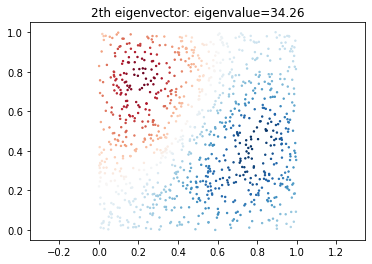

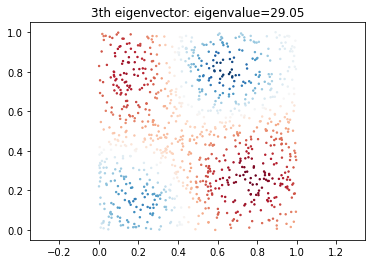

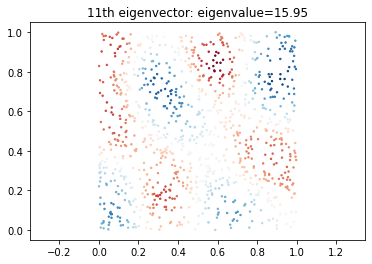

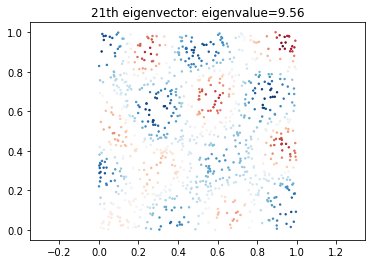

In [7]:
# get eigenvectors
ev = mcapprx.e

# get eigenvalues
lam = mcapprx.lam

# plot eigenvectors
for i in [0, 1, 2, 10, 20]:
    plt.axis("equal")
    plt.title("{}th eigenvector: eigenvalue={:.2f}".format(i+1, lam[i]))
    plt.scatter(X[:,0], X[:,1], c=ev[:,i], cmap="RdBu", s=2)
    plt.show()

# Compare exact and approximated eigenvectors

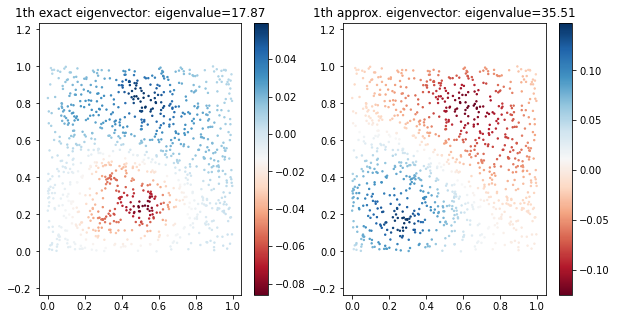

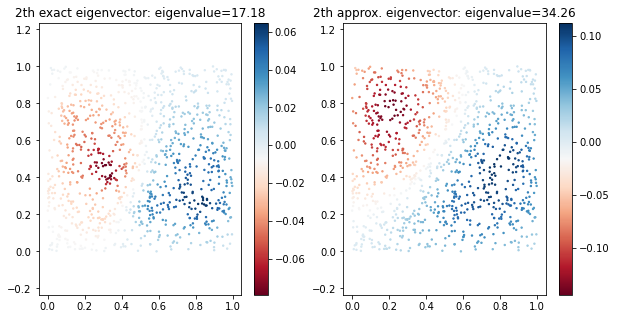

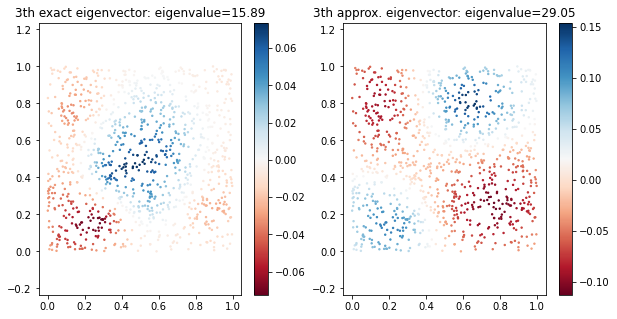

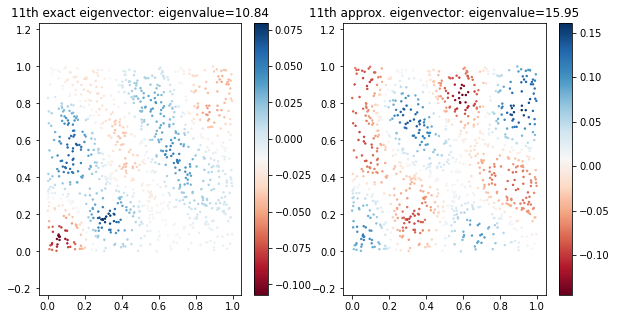

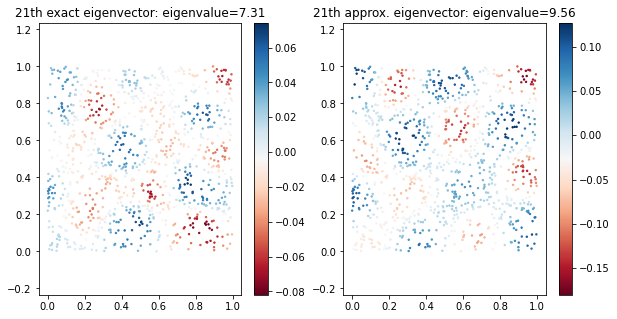

In [8]:
# plot eigenvectors
for i in [0, 1, 2, 10, 20]:
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.axis("equal")
    plt.title("{}th exact eigenvector: eigenvalue={:.2f}".format(i+1, mc.lam[i]))
    plt.scatter(X[:,0], X[:,1], c=mc.e[:,i], cmap="RdBu", s=2)
    plt.colorbar()

    plt.subplot(122)
    plt.axis("equal")
    plt.title("{}th approx. eigenvector: eigenvalue={:.2f}".format(i+1, mcapprx.lam[i]))
    plt.scatter(X[:,0], X[:,1], c=mcapprx.e[:,i], cmap="RdBu", s=2)
    plt.colorbar()

    plt.show()